## [06] 규제 선형 모델 - 릿지, 라쏘, 엘라스틱넷

**[규제 선형 모델의 개요]**

 : 회귀모델은 적절히 데이터에 적합하면서도 회귀계수가 기하급수적으로 커지는 것을 제어할 수 있어야 함. 
 
 : 비용함수는 학습 데이터의 잔추오류값을 최소로 하는 RSS 최소화 방법과 과적합을 방지하기 위해 회귀계수 값이 커지지 않도록 하는 방법이 균형을 이뤄야 함. 
 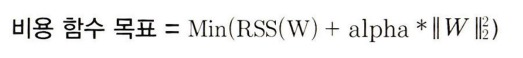

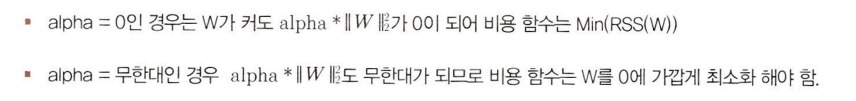

alpha를 0에서부터 지속적으로 값을 증가시키면 회귀 계수 값의 크기를 감소시킬 수 있음. 

=> 비용함수에 alpha값으로 페널티를 부여해 회귀 계수 값의 크기를 감소시켜 과적합을 개선하는 방식을 규제라고 함. 
 - L2 규제 : W의 제곱에 페널티를 부여. L2 규제를 적용한 회귀를 릿지 회귀라고 함. 
 - L1 규제 : W의 절댓값에 페널티를 부여. L1 규제를 적용한 회귀를 라쏘 회귀.

**[릿지 회귀]**

: 사이킷런은 Ridge클래스를 통해 릿지 회귀를 구현. 주요 생성 파라미터는 alpha.

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

data_url = "http://lib.stat.cmu.edu/datasets/boston"

raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

boston = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :3]])

# feature name이 없으므로 따로 지정해줘야 함.

feature_names=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX' ,'PTRATIO', 'B' ,'LSTAT', 'PRICE']

bostonDF = pd.DataFrame(boston, columns=feature_names)

In [2]:
from sklearn.model_selection import train_test_split

y_target = bostonDF['PRICE']
X_data=bostonDF.drop(['PRICE'], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3,
                                                    random_state=156)

In [3]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

#alpha=10으로 설정해 릿지 회귀 수행
ridge = Ridge(alpha=10)
neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error",cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5 folds의 개별 Negative MSE scores:', np.round(neg_mse_scores,3))
print('5 folds의 개별 RMSE scores:', np.round(rmse_scores,3))
print('5 folds의 평균 RMSE :, {0:.3f}'.format(avg_rmse))

5 folds의 개별 Negative MSE scores: [-11.422 -24.294 -28.144 -74.599 -28.517]
5 folds의 개별 RMSE scores: [3.38  4.929 5.305 8.637 5.34 ]
5 folds의 평균 RMSE :, 5.518


 - 릿지의 alpha값을 0,0.1,1,10,100으로 변화시키면서 RMSE와 회귀계수 값의 변화.

In [7]:
#릿지에 사용될 alpha파라미터의 값을 정의 
alphas = [0,0.1,1,10,100]

#alphas list값을 반복하면서 alpha에 따른 평균 rmse를 구함. 
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    
    #cross_val_score를 이용해 5폴드의 평균 RMSE를 계산. 
    neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring = "neg_mean_squared_error",cv=5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print('alpah {0} 일때 5folds의 평균 RMSE : {1:.3f}'.format(alpha, avg_rmse))

alpah 0 일때 5folds의 평균 RMSE : 5.829
alpah 0.1 일때 5folds의 평균 RMSE : 5.788
alpah 1 일때 5folds의 평균 RMSE : 5.653
alpah 10 일때 5folds의 평균 RMSE : 5.518
alpah 100 일때 5folds의 평균 RMSE : 5.330


 - alpha값의 볌화에 다른 피처의 회귀 계수 값을 가로 막대 그래프로 시각화.

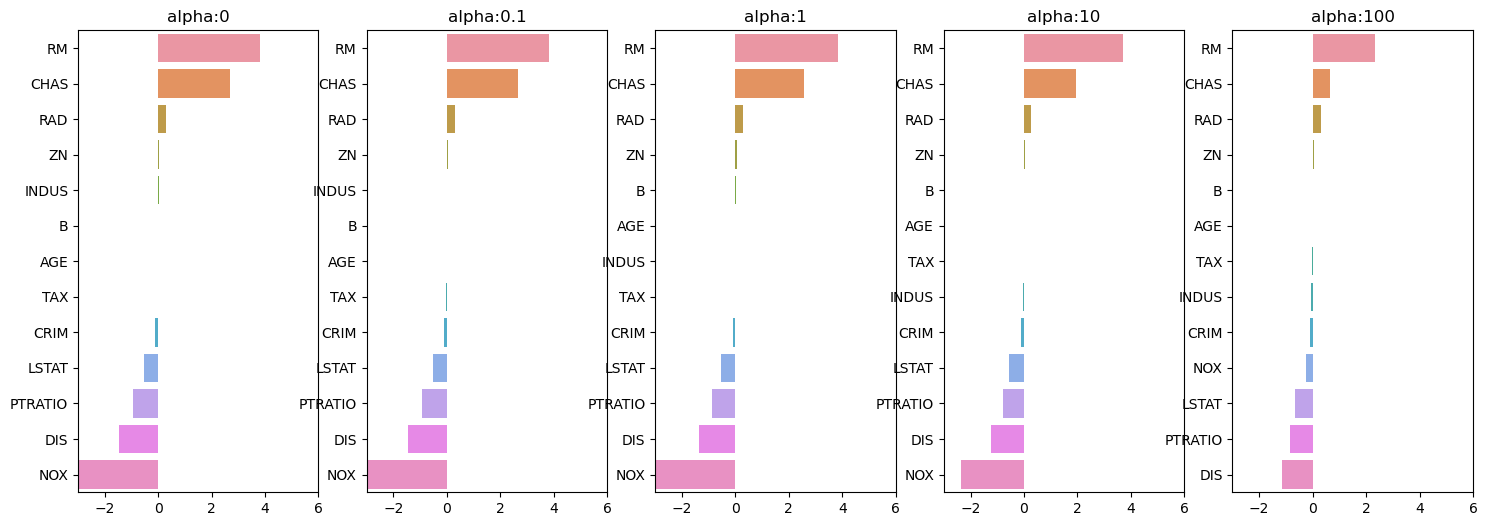

In [9]:
#각 alpha에 따른 회귀 계수 값을 시각화하기 위해 5개의 열로 된 맷플로립 축 생성
fig, axs = plt.subplots(figsize=(18,6),nrows=1, ncols=5)
#각 alpha에 따른 회귀 계수 값을 데이터로 저장하기 위한 DataFrame 생성
coeff_df = pd.DataFrame()

#alphas 리스트 값을 차례로 입력해 회귀 계수 값 시각화 및 데이터 저장. 
for pos, alpha in enumerate(alphas):
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_data,y_target)
    #alpha에 따른 피처별로 회귀 계수를 Series로 변환하고 이를 DataFrame의 칼럼으로 추가.
    coeff = pd.Series(data=ridge.coef_, index = X_data.columns)
    colname = 'alpha:'+str(alpha)
    coeff_df[colname] = coeff
    #막대 그래프로 각 alpha값에서의 회귀 계수를 시각화. 회귀 계수 값이 높은 순으로 표현
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values, y= coeff.index, ax=axs[pos])
plt.show()

In [10]:
ridge_alphas = [0,0.1,1,10,100]
sort_column = 'alpha:'+str(ridge_alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
RM,3.809865,3.818233,3.854000,3.702272,2.334536
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335
RAD,0.306049,0.303515,0.290142,0.279596,0.315358
ZN,0.046420,0.046572,0.047443,0.049579,0.054496
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826
B,0.009312,0.009368,0.009673,0.010037,0.009393
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
LSTAT,-0.524758,-0.525966,-0.533343,-0.559366,-0.660764


**[라쏘 회귀]**

: 불필요한 회귀 계수를 급격하게 감소시켜 0으로 만들고 제거. L1규제는 적절한 피처만 회귀에 포함시키는 피처 선택의 특성을 가지고 있음. 

: 사이킷런은 Lasso클래스를 통해 라쏘 회귀를 구현. 

: Lasso 클래스의 주요 생성 파라미터는 alpha이며, 이는 라쏘 회귀의 alpha1규제계수에 해당. 

In [12]:
from sklearn.linear_model import Lasso, ElasticNet

#alpha값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고 회귀 계수값들을 DataFrame으로 반환
def get_linear_reg_eval(model_name, params=None, X_data_n = None, y_target_n = None, verbose=True):
    coeff_df = pd.DataFrame()
    if verbose: print('######', model_name, '######')
    for param in params:
        if model_name == 'Ridge': model = Ridge(alpha=param)
        elif model_name == 'Lasso':model = Lasso(alpha=param)
        elif model_name == 'ElasticNet': model = ElasticNet(alpha=param, l1_ratio=0.7)
        neg_mse_scores = cross_val_score(model, X_data_n, y_target_n, scoring="neg_mean_squared_error", cv=5)
        avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
        print('alpha {0}일때 5 폴드 세트의 평균 RMSE:{1:.3f}'.format(param, avg_rmse))
        #cross_val_score는 evaluation metirc만 반환하므로 모델을 다시 학습하여 회귀 계쑤 추출
        model.fit(X_data, y_target)
        #alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 칼럼으로 추가
        coeff = pd.Series(data=model.coef_, index=X_data.columns)
        colname = 'alpha:'+str(param)
        coeff_df[colname] = coeff
    return coeff_df

In [13]:
#라쏘에 이용될 alpha파라미터 값을 정의하고 get-linear_reg_eval() 함수 호출.
lasso_alphas = [0.07,0.1,0.5,1,3]
coeff_lasso_df = get_linear_reg_eval('Lasso', params=lasso_alphas, X_data_n = X_data, y_target_n = y_target)

###### Lasso ######
alpha 0.07일때 5 폴드 세트의 평균 RMSE:5.612
alpha 0.1일때 5 폴드 세트의 평균 RMSE:5.615
alpha 0.5일때 5 폴드 세트의 평균 RMSE:5.669
alpha 1일때 5 폴드 세트의 평균 RMSE:5.776
alpha 3일때 5 폴드 세트의 평균 RMSE:6.189


In [14]:
#반환된 coeff_lasso_df를 첫번째 칼럼 순으로 내림차순 정렬해 회귀계수 DataFrame 출력
sort_column = 'alpha:'+str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.789725,3.703202,2.498212,0.949811,0.000000
CHAS,1.434343,0.955190,0.000000,0.000000,0.000000
RAD,0.270936,0.274707,0.277451,0.264206,0.061864
ZN,0.049059,0.049211,0.049544,0.049165,0.037231
B,0.010248,0.010249,0.009469,0.008247,0.006510
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
AGE,-0.011706,-0.010037,0.003604,0.020910,0.042495
TAX,-0.014290,-0.014570,-0.015442,-0.015212,-0.008602
INDUS,-0.042120,-0.036619,-0.005253,-0.000000,-0.000000
CRIM,-0.098193,-0.097894,-0.083289,-0.063437,-0.000000


**[엘라스틱넷 회귀]**

: 엘라스틱넷 회귀는 L2 규제와 L1 규제를 결합한 회귀. 엘라스틱넷은 라쏘 회귀가 서로 상관관계가 높은 피처들의 경우에 이들 중에서 중요 피처만을 셀렉션하고 다른 피처들은 모두 회귀 계수를 0으로 만드는 성향이 강함. 

: 사이킷런은 ElasticNet 클래스를 통해서 엘라스틱넷 회귀를 구현함. 

: ElasticNet 클래스의 주요 생성 파라미터는 alpha와 l1_ratio.

In [15]:
#엘라스틱넷에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
elastic_alphas = [0.07,0.1,0.5,1,3]
coeff_elastic_df = get_linear_reg_eval('ElasticNet', params=elastic_alphas,
                                      X_data_n = X_data, y_target_n = y_target)

###### ElasticNet ######
alpha 0.07일때 5 폴드 세트의 평균 RMSE:5.542
alpha 0.1일때 5 폴드 세트의 평균 RMSE:5.526
alpha 0.5일때 5 폴드 세트의 평균 RMSE:5.467
alpha 1일때 5 폴드 세트의 평균 RMSE:5.597
alpha 3일때 5 폴드 세트의 평균 RMSE:6.068


In [16]:
#반환된 coeff_elastic_df를 첫번째 칼럼순으로 내림차순 정렬해 회귀계수 DataFrame 출력
sort_column = 'alpha:'+str(elastic_alphas[0])
coeff_elastic_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.574162,3.414154,1.918419,0.938789,0.000000
CHAS,1.330724,0.979706,0.000000,0.000000,0.000000
RAD,0.278880,0.283443,0.300761,0.289299,0.146846
ZN,0.050107,0.050617,0.052878,0.052136,0.038268
B,0.010122,0.010067,0.009114,0.008320,0.007020
AGE,-0.010116,-0.008276,0.007760,0.020348,0.043446
TAX,-0.014522,-0.014814,-0.016046,-0.016218,-0.011417
INDUS,-0.044855,-0.042719,-0.023252,-0.000000,-0.000000
CRIM,-0.099468,-0.099213,-0.089070,-0.073577,-0.019058
NOX,-0.175072,-0.000000,-0.000000,-0.000000,-0.000000


**[선형 회귀 모델을 위한 데이터 변환]**

타깃값이 정규 분포 형태가 아니라 특정값의 분포가 치우친 왜곡된 형태의 분포도일 경우 예측 성능에 부정적인 영향을 미칠 가능성이 높음. 

따라서, 선형 회귀 모델을 적용하기 전에 먼저 데이터에 대한 스케일링/정규화 작업을 수행하는 것이 일반적임. 이러한 스케일링/정규화 작업을 선행한다고 해서 무조건 예측 성능이 향상되는 것은 아님. 일반적으로 중요 피처들이나 타깃값의 분포도가 심하게 왜곡됐을 경우에 이러한 변환 작업을 수행.

In [17]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures

#method는 표준 정규 분포 변환(Stadard), 최댓값/최솟값 정규화(MinMax), 로그 변환(Log) 결정
#p_degree는 다항식 특성을 추가할 때 적용, p_degree는 2이상 부여하지 않음.
def get_scaled_data(method = 'None', p_degree=None, input_data=None):
  if method == 'Standard':
    scaled_data = StandardScaler().fit_transform(input_data)
  elif method == 'MinMax':
    scaled_data = MinMaxScaler().fit_transform(input_data)
  elif method == 'Log':
    scaled_data = np.log1p(input_data)
  else:
    scaled_data = input_data

  if p_degree != None :
    scaled_data = PolynomialFeatures(degree=p_degree, include_bias = False).fit_transform(scaled_data)

  return scaled_data   

In [18]:
#Ridge의 alpha값을 다르게 적용하고 다양한 데이터 변환 방법에 따른 RMSE 추출
alphas = [0.1,1,10,100]

#5개 방식으로 변환. 먼저 원본 그대로, 표준정규 분포, 표준정규 분포 + 다항식 특성
#최대/최소 정규화, 최대/최소 정규화+다항식 특성, 로그 변환
scaled_methods = [(None,None), ('Standard',None), ('Standard', 2), ('MinMax', None), ('MinMax', 2), ('Log', None)]
for scaled_method in scaled_methods:
  X_data_scaled = get_scaled_data(method=scaled_method[0], p_degree=scaled_method[1], input_data=X_data)
  print('\n 변환 유형 : {0}, Polynomial Degree : {1}'. format(scaled_method[0], scaled_method[1]))
  get_linear_reg_eval('Ridge', params=alphas, X_data_n = X_data, y_target_n = y_target, verbose=False)


 변환 유형 : None, Polynomial Degree : None
alpha 0.1일때 5 폴드 세트의 평균 RMSE:5.788
alpha 1일때 5 폴드 세트의 평균 RMSE:5.653
alpha 10일때 5 폴드 세트의 평균 RMSE:5.518
alpha 100일때 5 폴드 세트의 평균 RMSE:5.330

 변환 유형 : Standard, Polynomial Degree : None
alpha 0.1일때 5 폴드 세트의 평균 RMSE:5.788
alpha 1일때 5 폴드 세트의 평균 RMSE:5.653
alpha 10일때 5 폴드 세트의 평균 RMSE:5.518
alpha 100일때 5 폴드 세트의 평균 RMSE:5.330

 변환 유형 : Standard, Polynomial Degree : 2
alpha 0.1일때 5 폴드 세트의 평균 RMSE:5.788
alpha 1일때 5 폴드 세트의 평균 RMSE:5.653
alpha 10일때 5 폴드 세트의 평균 RMSE:5.518
alpha 100일때 5 폴드 세트의 평균 RMSE:5.330

 변환 유형 : MinMax, Polynomial Degree : None
alpha 0.1일때 5 폴드 세트의 평균 RMSE:5.788
alpha 1일때 5 폴드 세트의 평균 RMSE:5.653
alpha 10일때 5 폴드 세트의 평균 RMSE:5.518
alpha 100일때 5 폴드 세트의 평균 RMSE:5.330

 변환 유형 : MinMax, Polynomial Degree : 2
alpha 0.1일때 5 폴드 세트의 평균 RMSE:5.788
alpha 1일때 5 폴드 세트의 평균 RMSE:5.653
alpha 10일때 5 폴드 세트의 평균 RMSE:5.518
alpha 100일때 5 폴드 세트의 평균 RMSE:5.330

 변환 유형 : Log, Polynomial Degree : None
alpha 0.1일때 5 폴드 세트의 평균 RMSE:5.788
alpha 1일때 5 폴드 세트의 평균 RMSE:5.

## [7] 로지스틱 회귀

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

cancer = load_breast_cancer()

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#StandardSclaer()로 평균이 0, 분산 1로 데이터 분포도 변환
scaler = StandardScaler()
data_scaled = scaler.fit_transform(cancer.data)

X_train, X_test, y_train, y_test = train_test_split(data_scaled, cancer.target, test_size=0.3, random_state=0)

In [21]:
from sklearn.metrics import accuracy_score, roc_auc_score

#로지스틱 회귀를 이용해 학습 및 예측 수행.
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_preds = lr_clf.predict(X_test)

#정확도와 roc_auc 측정
print('accuracy: {:0.3f}'.format(accuracy_score(y_test, lr_preds)))
print('roc_auc: {:0.3f}'.format(roc_auc_score(y_test, lr_preds)))

accuracy: 0.977
roc_auc: 0.972


In [22]:
from sklearn.model_selection import GridSearchCV

params={'penalty':['l2','l1'],
        'C':[0.01,0.1,1,1,5,10]}
grid_clf = GridSearchCV(lr_clf, param_grid=params, scoring='accuracy', cv=3)
grid_clf.fit(data_scaled, cancer.target)
print('최적 하이퍼 파라미터:{0}, 최적 평균 정확도:{1:.3f}'.format(grid_clf.best_params_, grid_clf.best_score_))

최적 하이퍼 파라미터:{'C': 1, 'penalty': 'l2'}, 최적 평균 정확도:0.975


C:\Users\june0\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
18 fits failed out of a total of 36.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\june0\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\june0\anaconda3\lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\june0\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1168, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)